In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
BASE_DIR = Path().absolute().parent.parent
sys.path.append(str(BASE_DIR))

In [3]:
from bayes_opt_adaptive  import BayesianOptimization
from bayes_opt_adaptive import UtilityFunction
from scipy.optimize import minimize, NonlinearConstraint, Bounds, SR1
from bayes_opt_adaptive.logger import JSONLogger
from bayes_opt_adaptive.event import Events
from bayes_opt_adaptive.util import load_logs
from cases import Case1,Case2,Case3T
import numpy as np
import pandas as pd

In [4]:
DIR = BASE_DIR/'scripts_res'/'Case3TAC3'
DIR

WindowsPath('d:/OneDrive/Current/2_Codes/BO_Related/ASBO/ASBO/scripts_res/Case3TAC3')

In [5]:
def cleaning(df2,n_init,iter,opt):
    cumulative_max_df = pd.DataFrame()
    
    for index, row in df2.iterrows():
        initial_max = row[list(range(n_init))].max()
        cumulative_max_list = [initial_max]
        current_max = initial_max
        for iter_value in row[list(range(n_init,n_init+iter,1))]:
            if iter_value > current_max:
                current_max = iter_value  
            cumulative_max_list.append(current_max)  
        cumulative_max_df = pd.concat([cumulative_max_df, pd.DataFrame([cumulative_max_list])], ignore_index=True)
    cumulative_max_df.columns = [f'iter_{i+1}' for i in range(iter+1)]
    cumulative_max_df = cumulative_max_df.replace(-np.inf, np.nan)
    non_inf_counts =  cumulative_max_df.count()
    std = cumulative_max_df.std()
    mean = cumulative_max_df.mean(axis=0)
    regret_mean = np.log10(opt - mean)
    upper = np.log10(opt - mean + 1.96*std/np.sqrt(non_inf_counts)) #cumulative_max_df.shape[0]
    lower = np.log10(opt - mean - 1.96*std/np.sqrt(non_inf_counts))

    return cumulative_max_df,regret_mean,lower,upper,non_inf_counts


In [6]:
df = pd.read_csv(DIR/'Case3T_9_Strategy1_Results.csv')
df.describe()

,obj,x_1,x_2,x_3,x_4,x_5,con_1,con_2,con_3,con_4
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,-4.428478,1.437682,-0.903066,0.933446,2.570903,0.001866,0.849261,0.553058,1.237101,0.759256
std,5.991779,2.768361,2.699788,3.277410,5.275510,3.793341,1.006224,1.149248,1.279565,0.469993
min,-18.198143,-2.214486,-5.965186,-3.988715,-2.008186,-5.947014,-0.669594,-0.849640,-0.062368,0.144447
25%,-4.905977,-0.956262,-1.986041,0.078040,-0.988248,-1.976926,0.111074,-0.367419,0.328849,0.349882
50%,-4.438311,1.987168,-0.803776,0.165657,1.946520,-0.015100,1.240735,0.798057,0.571748,0.833906
75%,-1.028639,2.057239,1.077813,3.946805,2.071284,1.137960,1.693183,1.147311,2.774139,1.133516
max,2.837060,5.961188,1.992082,5.992287,15.095042,6.979299,1.863388,2.523193,2.966808,1.477040


In [7]:
df = pd.read_csv(DIR.parent/'Case3THyper3'/'ASBO_Hyper_Results2_Case3T_5_5.csv')
df = df.loc[15:19,:]
_,regret_mean_S123,lower_S123,upper_S123,non_S123 = cleaning(df,n_init=100,iter=200,opt=4.49)
# non_S123

In [8]:
df = pd.read_csv(DIR/'Case3T_9_Strategy1_Results2.csv')
df = df.loc[0:4,:]
a,regret_mean_S1,lower_S1,upper_S1,non_S1 = cleaning(df,n_init=100,iter=200,opt=4.49)
# non_S1

In [9]:
df = pd.read_csv(DIR/'Case3T_9_Strategy2_Results2.csv')
df = df.loc[0:4,:]
b,regret_mean_S2,lower_S2,upper_S2,non_S2 = cleaning(df,n_init=100,iter=200,opt=4.49)
print(non_S2.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


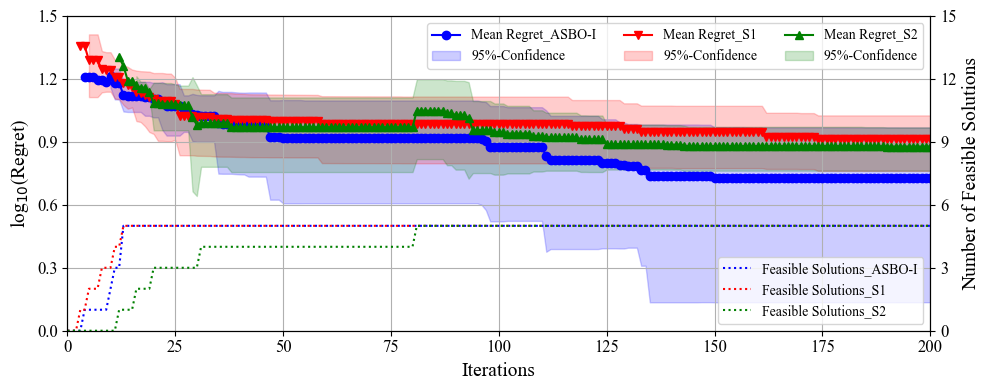

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import math
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

plt.figure(figsize=(10,4))
iterations = range(201)

plt.plot(iterations, regret_mean_S123, marker='o', color='b', label='Mean Regret_ASBO-I')
plt.fill_between(iterations, lower_S123 , upper_S123, color='b', alpha=0.2, label='95%-Confidence')
plt.plot(iterations, regret_mean_S1, marker='v', color='r', label='Mean Regret_S1')
plt.fill_between(iterations, lower_S1 , upper_S1, color='r', alpha=0.2, label='95%-Confidence')
plt.plot(iterations, regret_mean_S2, marker='^', color='green', label='Mean Regret_S2')
plt.fill_between(iterations, lower_S2 , upper_S2, color='green', alpha=0.2, label='95%-Confidence')

plt.xlabel('Iterations', fontsize=14)
plt.xlim(0,200)
plt.ylim(0,1.5)
plt.yticks([0, 0.3, 0.6, 0.9, 1.2,1.5])
# plt.ylabel(r"$\log_{10}(\mathrm{Regret})$", fontsize=14)
plt.ylabel(r"log$_{10}$(Regret)", fontsize=14)
plt.legend(ncol=3)
plt.grid()

ax2 = plt.gca().twinx()
# ax2.bar(iterations, non_S123, color='blue', alpha=0.3, label='Feasible Runs_ASBO-I', width=1.0)
# ax2.bar(iterations, non_S1, color='red', alpha=0.3, label='Feasible Runs_S1', width=1.0)
# ax2.bar(iterations, non_S2, color='green', alpha=0.3, label='Feasible Runs_S2', width=1.0)
ax2.plot(iterations, non_S123, 'b:', label='Feasible Solutions_ASBO-I')
ax2.plot(iterations, non_S1, 'r:', label='Feasible Solutions_S1')
ax2.plot(iterations, non_S2, 'g:', label='Feasible Solutions_S2')
ax2.set_ylabel('Number of Feasible Solutions', fontsize=14)

lines_1, labels_1 = plt.gca().get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.ylim(0,15)
plt.legend(loc='lower right',ncol=1)#
plt.yticks([0, 3, 6, 9, 12,15])
plt.tight_layout()
plt.savefig(DIR/'AC_CompRegret_Case3T.png',dpi=300)
plt.show()

In [10]:
data_dict = {
    'Mean_S1': regret_mean_S1,
    'Lower_S1': lower_S1,
    'Upper_S1': upper_S1,
    'S1': non_S1,
    'Mean_S2': regret_mean_S2,
    'Lower_S2': lower_S2,
    'Upper_S2': upper_S2,
    'S2': non_S2,
    'Mean_S123': regret_mean_S123,
    'Lower_S123': lower_S123,
    'Upper_S123': upper_S123,
    'S123': non_S123,    
}

combined_df = pd.concat(data_dict, axis=1)  
combined_df.to_csv(DIR/'Figure5.csv') 